In today's session we again worked with **iris** dataset. Each entry in it has 4 attributes we tried two different ways to reduce the number of dimensions to 2. The first one was Henrik's idea to look at sepal and petal width-to-length ratios, the other was using PCA with 2 components.

In [1]:
# regular imports
from sklearn import datasets
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# draw pictures right here
%matplotlib inline

Let's PCA the iris dataset

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data
Y = iris.target

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Now let's create a new dataset with only 2 ratio-features

In [3]:
X_mod = [[x[0]/x[2], x[1]/x[3]] for x in X]
X_mod[:5] # yepp, 2d

[[3.6428571428571428, 17.5],
 [3.5000000000000004, 15.0],
 [3.6153846153846154, 16.0],
 [3.0666666666666664, 15.5],
 [3.5714285714285716, 18.0]]

Let's plot all the points in the same color. We see that some points are in the corner, some are spread well apart.

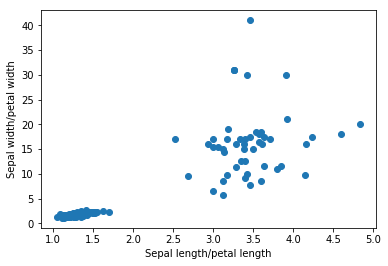

In [4]:
plt.scatter([x[0] for x in X_mod], [x[1] for x in X_mod], cmap=plt.cm.Paired)
plt.xlabel('Sepal length/petal length')
plt.ylabel('Sepal width/petal width')

Let's color all the points belonging to the same class with the same color.

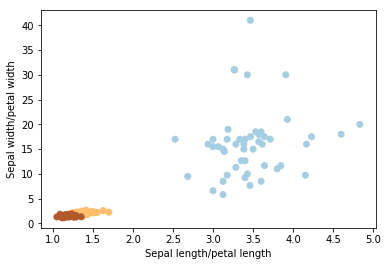

In [5]:
# Plot the training points
plt.scatter([x[0] for x in X_mod], [x[1] for x in X_mod], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length/petal length')
plt.ylabel('Sepal width/petal width')

In [6]:
# So, one color for each of these species
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

Let's use kMeans clustering algo to group these points into 3 clusters.

In [7]:
from sklearn.cluster import KMeans
estimator = KMeans(n_clusters=3)
estimator.fit(X_mod)
estimator.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Let's now plot what kMeans thinks is a good separation into 3 clusters.

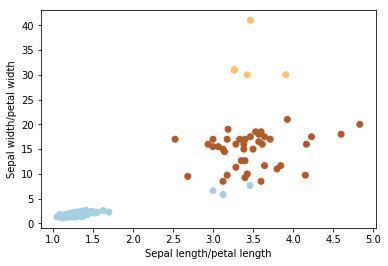

In [8]:
plt.scatter([x[0] for x in X_mod], [x[1] for x in X_mod], c=estimator.labels_, cmap=plt.cm.Paired)
plt.xlabel('Sepal length/petal length')
plt.ylabel('Sepal width/petal width')

Apparently, the algorithm is unable to "see" that the corner group contain 2 classes, not 1. And the wide-spread class earned itself 2 clusters. Ok :)

Let's try to reduce the number of dimensions by using PCA.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

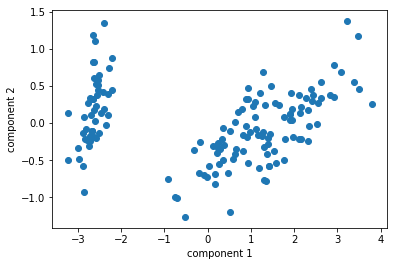

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap=plt.cm.Paired)
plt.xlabel('component 1')
plt.ylabel('component 2')

This picture has about 2 distinct groups of points. Let's try splitting them into 3 clusters.

In [11]:
estimator = KMeans(n_clusters=3)
estimator.fit(X_pca)
estimator.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Let's plot the real classes along with cluster-predicted classes and cluster centers.

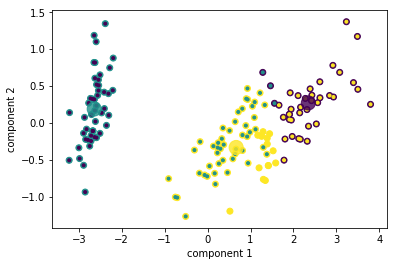

In [28]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=estimator.labels_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, s=9)  # big points
plt.xlabel('component 1')
plt.ylabel('component 2')
cc = estimator.cluster_centers_
cc
plt.scatter(cc[:, 0], cc[:, 1], c=[1,2,3], s=200, alpha=0.8)

The leftmost (linearly separable) class is almost completely in the predicted cluster, the other 2 have a bit of misclassification, seen as weird outer/inner color combinations.